We need to take measurements to determine how sound propagates through the dart as a function of distance from a microphone.

In [1]:
import pandas as pd
import math
import numpy as np
from scipy.spatial import distance
import itertools


In [33]:
TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

def turn(p, q, r):
    """Returns -1, 0, 1 if p,q,r forms a right, straight, or left turn."""
    return cmp((q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1]), 0)
def _next_hull_pt(points, p):
    """Returns the next point on the convex hull in CCW from p."""
    q = points[0] != p and points[0] or points[1]
    for r in (x for x in points if x != p):
        if turn(p, q, r) == TURN_RIGHT:
            q = r
    return q
def _dist(p, q):
    """Returns the squared Euclidean distance between p and q."""
    dx, dy = q[0] - p[0], q[1] - p[1]
    return dx * dx + dy * dy

def _next_hull_pt(points, p):
    """Returns the next point on the convex hull in CCW from p."""
    q = p
    for r in points:
        t = turn(p, q, r)
        if t == TURN_RIGHT or t == TURN_NONE and _dist(p, r) > _dist(p, q):
            q = r
    return q

def convex_hull(points):
    """Returns the points on the convex hull of points in CCW order."""
    hull = [min(points)]
    for p in hull:
        q = _next_hull_pt(points, p)
        if q != hull[0]:
            hull.append(q)
    return hull



class censor:
    def __init__(self,x,y):
        self.position = (x,y)
        self.x = x
        self.y = y

        
        
class censor_box:
    '''censor box must be initiated with a tuple of censors'''
    def __init__(self,censors):
        self.censors = censors
        self.edge_count = len(censors)
        self.censor_positions = tuple([c.position for c in self.censors])
        self.edges = convex_hull(self.censor_positions)
        
        
        
                
def convert_signal_to_distance(signal):
    return 1 / (signal**2)
        

In [34]:
A = censor(1,2)
B = censor(3,5)
C = censor(4,2)
D = censor(3,3)

In [40]:
box = censor_box((A,B,C,D))

In [2]:
from scipy.io import wavfile

In [3]:
data = wavfile.read("0_mid.wav")

In [4]:
data

(44100, array([  285,  -254, -1067, ...,   427,   447,    -2], dtype=int16))

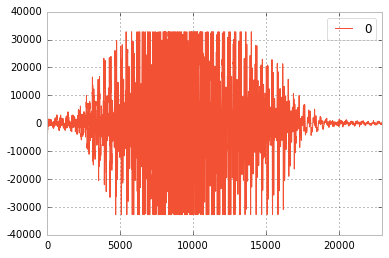

In [8]:
%matplotlib inline
pd.DataFrame(data[1]).plot()